In [1]:
import pandas as pd
import numpy as np
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re
from contractions import contractions_dict
from nltk.corpus import stopwords, wordnet
from spacy.lang.en.stop_words import STOP_WORDS
from itertools import filterfalse
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [5]:
df.v2

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

# Steps involved in natural language processing  
<ul>
    <li><h5>Remove of stops words, symbols, special characters, puncuation marks, Digit/numbers,</h5></li>
    <li><h5>Tokenization</h5></li>
    <li><h5>Stemming (removing repetition of words i.e tenses) but not fool proof</h5></li>
    <li><h5>Lemmatization (smart stemming, uses POS(part of speech) tags to perform lemmatization of words(Interest/Interesting))</h5></li>
    <li><h5>converting all words in lowercase</h5></li>
    <li><h5>remove contraction (sort shouldn't and should not type problems)</h5></li>
</ul>

<h3 style="color:red">libraries used nltk, spacy, contractions, regular expressions</h3>

#### tokenization

In [6]:
df['v2'] = df['v2'].apply(lambda x :word_tokenize(x))

In [7]:
df.v2[0]

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat',
 '...']

#### lowercasing list of token

In [8]:
def lowercase_tokens(list_of_tokens):
    return map(lambda x: x.lower(),list_of_tokens)

In [9]:
df['v2'] = df.v2.apply(lambda x : lowercase_tokens(x))

In [10]:
df['v2'] = df.v2.apply(lambda x : list(x))

In [11]:
df.v2

0       [go, until, jurong, point, ,, crazy, .., avail...
1                [ok, lar, ..., joking, wif, u, oni, ...]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, ..., u, c, alrea...
4       [nah, i, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568     [will, �_, b, going, to, esplanade, fr, home, ?]
5569    [pity, ,, *, was, in, mood, for, that, ., so, ...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                  [rofl, ., its, true, to, its, name]
Name: v2, Length: 5572, dtype: object

#### Removing contrations

In [12]:
# contractions_dict.keys()

In [13]:
def contracted_word_expansion(token):
    if token in contractions_dict.keys():
        return contractions_dict[token]
    else:
        return token
    

In [14]:
def contractions_expansion(list_of_tokens):
    return map(contracted_word_expansion,list_of_tokens)

In [15]:
df['v2'] = df['v2'].apply(lambda x: contractions_expansion(x))

In [16]:
df['v2'] = df.v2.apply(lambda x: list(x))

In [17]:
df.v2[0]

['go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'cine',
 'there',
 'got',
 'amore',
 'wat',
 '...']

In [18]:
regex = r'^@[a-zA-z0-9]|^#[a-zA-Z0-9]|\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*|\W+|\d+|<("[^"]*"|\'[^\']*\'|[^\'">])*>|_+|[^\u0000-\u007f]+'

In [19]:
def remove_waste_words(token):
    return re.search(regex, token)

In [20]:
def filter_waste_words(list_of_tokens):
    return filterfalse(remove_waste_words,list_of_tokens)
    

In [21]:
df['v2'] = df['v2'].apply(lambda x: filter_waste_words(x))

In [22]:
df.v2

0       <itertools.filterfalse object at 0x0000015C92C...
1       <itertools.filterfalse object at 0x0000015C92C...
2       <itertools.filterfalse object at 0x0000015C92C...
3       <itertools.filterfalse object at 0x0000015C92C...
4       <itertools.filterfalse object at 0x0000015C92C...
                              ...                        
5567    <itertools.filterfalse object at 0x0000015C92C...
5568    <itertools.filterfalse object at 0x0000015C92C...
5569    <itertools.filterfalse object at 0x0000015C92C...
5570    <itertools.filterfalse object at 0x0000015C92C...
5571    <itertools.filterfalse object at 0x0000015C92C...
Name: v2, Length: 5572, dtype: object

In [23]:
df['v2'] = df.v2.apply(lambda x: list(x))

In [24]:
df.v2

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, a, wkly, comp, to, win, fa, ...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, do, think, he, goes, to, usf, he, liv...
                              ...                        
5567    [this, is, the, time, we, have, tried, contact...
5568            [will, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, so, any, othe...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: v2, Length: 5572, dtype: object

### remove stop words

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
en_stop_words = list(set(stopwords.words('english')).union(set(STOP_WORDS)))

In [27]:
len(en_stop_words)

382

In [28]:
def is_stopword(token):
    return not(token in en_stop_words or re.search(r'\b\w\b|[^\u0000-\u007f]+|_+|\W+',token))

In [29]:
def stopwords_removal(list_of_tokens):
    return filter(is_stopword,list_of_tokens)

In [30]:
df['v2'] = df['v2'].apply(lambda x: stopwords_removal(x))

In [31]:
df['v2'] = df['v2'].apply(lambda x: list(x))

In [32]:
df.v2

0       [jurong, point, crazy, available, bugis, great...
1                             [ok, lar, joking, wif, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3                                       [dun, early, hor]
4                          [nah, think, goes, usf, lives]
                              ...                        
5567    [time, tried, contact, pound, prize, claim, ea...
5568                         [going, esplanade, fr, home]
5569                            [pity, mood, suggestions]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                         [rofl, true]
Name: v2, Length: 5572, dtype: object

### part of speech tags

In [33]:
def get_wnet_pos_tag(treebank_tag):
    if treebank_tag[1].startswith('J'):
        return (treebank_tag[0],wordnet.ADJ)
    elif treebank_tag[1].startswith('V'):
        return (treebank_tag[0],wordnet.VERB)
    elif treebank_tag[1].startswith('N'):
        return (treebank_tag[0],wordnet.NOUN)
    elif treebank_tag[1].startswith('R'):
        return (treebank_tag[0],wordnet.ADV)
    else:
        (treebank_tag[0],wordnet.NOUN)

In [34]:
def get_pos_tag(list_of_tokens):
    return map(get_wnet_pos_tag,pos_tag(list_of_tokens))


In [35]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [36]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
df['v2'] = df['v2'].apply(lambda x: get_pos_tag(x))

In [38]:
df['v2'] = df['v2'].apply(lambda x: list(x))

In [39]:
lst = []
for i in df.v2:
    lst.append(len(i))
    

In [40]:
lst.count(0)

35

In [41]:
len(df)

5572

In [42]:
len(lst)

5572

In [43]:
df['len'] = lst

In [44]:
df = df[df.len != 0]

In [45]:
df

,v1,v2,len
0,ham,"[(jurong, a), (point, n), (crazy, n), (availab...",13
1,ham,"[(ok, a), (lar, a), (joking, n), (wif, n), (on...",5
2,spam,"[(free, a), (entry, n), (wkly, v), (comp, n), ...",18
3,ham,"[(dun, r), (early, a), (hor, n)]",3
4,ham,"[(nah, r), (think, n), (goes, v), (usf, a), (l...",5
...,...,...,...
5567,spam,"[(time, n), (tried, v), (contact, a), (pound, ...",8
5568,ham,"[(going, v), (esplanade, a), (fr, n), (home, n)]",4
5569,ham,"[(pity, n), (mood, n), (suggestions, n)]",3
5570,ham,"[(guy, n), (bitching, v), (acted, v), None, (i...",9


### apply lemmatization

In [46]:
df.head()

,v1,v2,len
0,ham,"[(jurong, a), (point, n), (crazy, n), (availab...",13
1,ham,"[(ok, a), (lar, a), (joking, n), (wif, n), (on...",5
2,spam,"[(free, a), (entry, n), (wkly, v), (comp, n), ...",18
3,ham,"[(dun, r), (early, a), (hor, n)]",3
4,ham,"[(nah, r), (think, n), (goes, v), (usf, a), (l...",5


In [47]:
lemmatizer = WordNetLemmatizer()

In [48]:
def token_lemmatization(token_pos_tuple):
    if token_pos_tuple == None:
        return ""
    else:
        return lemmatizer.lemmatize(word=token_pos_tuple[0],pos=token_pos_tuple[1])

In [49]:
def lemmatization(list_of_tokens):
    if len(list_of_tokens) > 0:
        return map(lambda x: token_lemmatization(x),list_of_tokens)

In [50]:
df['v2'] = df['v2'].apply(lambda x: lemmatization(x))

In [51]:
df['v2'] = df['v2'].apply(lambda x: list(x))

In [52]:
df.v2

0       [jurong, point, crazy, available, bugis, great...
1                             [ok, lar, joking, wif, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3                                       [dun, early, hor]
4                             [nah, think, go, usf, life]
                              ...                        
5567    [time, try, contact, pound, prize, claim, easy...
5568                            [go, esplanade, fr, home]
5569                             [pity, mood, suggestion]
5570    [guy, bitch, act, , interested, buying, week, ...
5571                                         [rofl, true]
Name: v2, Length: 5537, dtype: object

In [53]:
vocab = set()
for lst in df.v2:
    for words in lst:
        vocab.add(words)

### can be written as

In [54]:
v = set()
for list_f_tok in df.v2:
    v = v.union(set(list_f_tok))

In [55]:
len(v)

6014

In [56]:
vocab

{'',
 'jeri',
 'meatballs',
 'ny',
 'relation',
 'nb',
 'claire',
 'mess',
 'pay',
 'parco',
 'hun',
 'bbc',
 'sacrifice',
 'particular',
 'aptitude',
 'pressure',
 'invest',
 'woould',
 'embarassed',
 'jerk',
 'comp',
 'listener',
 'qing',
 'motivate',
 'infection',
 'remain',
 'resize',
 'tulip',
 'askin',
 'ashley',
 'stair',
 'pleasured',
 'discus',
 'vibrant',
 'woul',
 'vry',
 'salon',
 'batchlor',
 'abdomen',
 'goodtime',
 'sexy',
 'colleague',
 'janx',
 'exterminator',
 'imin',
 'sittin',
 'foregate',
 'analysis',
 'query',
 'cramp',
 'cthen',
 'audition',
 'silence',
 'smokin',
 'champ',
 'school',
 'animal',
 'graze',
 'broadband',
 'comb',
 'decided',
 'harry',
 'desparately',
 'guess',
 'repeat',
 'depends',
 'life',
 'inever',
 'jamster',
 'lick',
 'jada',
 'decision',
 'joke',
 'tap',
 'notice',
 'payasam',
 'bullshit',
 'strip',
 'tyler',
 'neglet',
 'chess',
 'gona',
 'anonymous',
 'tohar',
 'callin',
 'macleran',
 'leh',
 'belt',
 'lux',
 'career',
 'enjoy',
 'epsilon'

In [57]:
len(vocab)

6014

In [58]:
df

,v1,v2,len
0,ham,"[jurong, point, crazy, available, bugis, great...",13
1,ham,"[ok, lar, joking, wif, oni]",5
2,spam,"[free, entry, wkly, comp, win, fa, cup, final,...",18
3,ham,"[dun, early, hor]",3
4,ham,"[nah, think, go, usf, life]",5
...,...,...,...
5567,spam,"[time, try, contact, pound, prize, claim, easy...",8
5568,ham,"[go, esplanade, fr, home]",4
5569,ham,"[pity, mood, suggestion]",3
5570,ham,"[guy, bitch, act, , interested, buying, week, ...",9


In [59]:
df['v1'].replace({'ham':0,'spam': 1},inplace=True)

In [60]:
df.drop(['len'],axis=1,inplace=True)

In [61]:
df.head()

,v1,v2
0,0,"[jurong, point, crazy, available, bugis, great..."
1,0,"[ok, lar, joking, wif, oni]"
2,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,"[dun, early, hor]"
4,0,"[nah, think, go, usf, life]"


### Compute TF-IDF
#### term frequency: 
<p> TF of a word appearing in a document. 
    <strong>Frequency of a word in the document / Total words in the document</strong> </p>

#### Inverse Document frequency:
<strong> log(Total number of documents / number of documents in which the word is appearing  </strong>
#### will be a row vector

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
vectorizer = TfidfVectorizer()

### converting list of tokens into a single string

In [64]:
def join_tokens(lst_of_token):
    return " ".join(lst_of_token)
df.v2 = df.v2.apply(lambda  x: join_tokens(x))

In [65]:
corpus = []

for email in df.v2:
    corpus.append(email)

In [66]:
tf_idf_matrix = vectorizer.fit_transform(corpus)

In [67]:
tf_idf_matrix.shape

(5537, 6004)

In [68]:
vectorizer.get_feature_names()

['aa',
 'aah',
 'aaniye',
 'aaooooright',
 'aathi',
 'ab',
 'abbey',
 'abdomen',
 'abeg',
 'abel',
 'aberdeen',
 'abi',
 'ability',
 'abiola',
 'abj',
 'able',
 'abnormally',
 'aboutas',
 'abroad',
 'absence',
 'absolutely',
 'absolutly',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abuse',
 'abuser',
 'ac',
 'academic',
 'acc',
 'accent',
 'accenture',
 'accept',
 'access',
 'accessible',
 'accidant',
 'accident',
 'accidentally',
 'accommodation',
 'accommodationvouchers',
 'accomodate',
 'accomodations',
 'accordin',
 'accordingly',
 'account',
 'accumulation',
 'achan',
 'ache',
 'achieve',
 'acid',
 'acknowledgement',
 'acnt',
 'aco',
 'act',
 'actin',
 'action',
 'activate',
 'active',
 'activity',
 'actor',
 'actual',
 'actually',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'addict',
 'addie',
 'address',
 'adewale',
 'adi',
 'adjustable',
 'admin',
 'administrator',
 'admirer',
 'admission',
 'admit',
 'adore',
 'adress',
 'adrian',
 'adsense',
 'adult',
 'advance',
 'adventure',
 'advi

In [69]:
tf_idf_matrix = tf_idf_matrix.toarray()

In [70]:
data = pd.DataFrame(tf_idf_matrix)

In [71]:
data['target'] = df['v1']

In [72]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,5995,5996,5997,5998,5999,6000,6001,6002,6003,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Applying PCA

In [73]:
from sklearn.decomposition import PCA

In [74]:
pca = PCA(n_components=2000)

In [75]:
data_pca = pca.fit_transform(data.iloc[:, :-1])

In [76]:
data_pca.shape

(5537, 2000)

In [77]:
# Principal Components Weights (Eigenvectors)
df_pca_loadings = pd.DataFrame(pca.components_)
df_pca_loadings.shape

(2000, 6004)

In [78]:
data_pca = pd.DataFrame(data_pca)

In [79]:
print(pca.explained_variance_ratio_.round(2)[:10])

[0.01 0.01 0.01 0.01 0.01 0.01 0.   0.   0.   0.  ]


In [80]:
import matplotlib.pyplot as plt

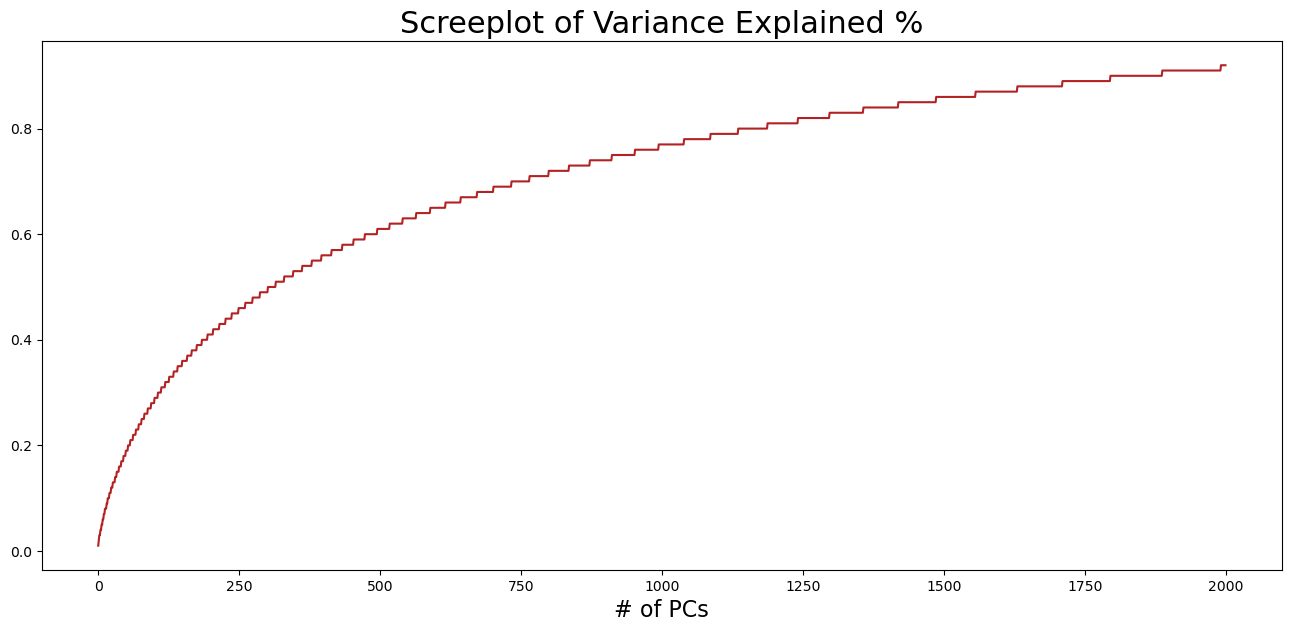

In [81]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

In [82]:
from scipy.spatial import ConvexHull

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

In [83]:

# Row masks for each category
rows_0 = df.v1==0;
rows_1 = df.v1==1; 

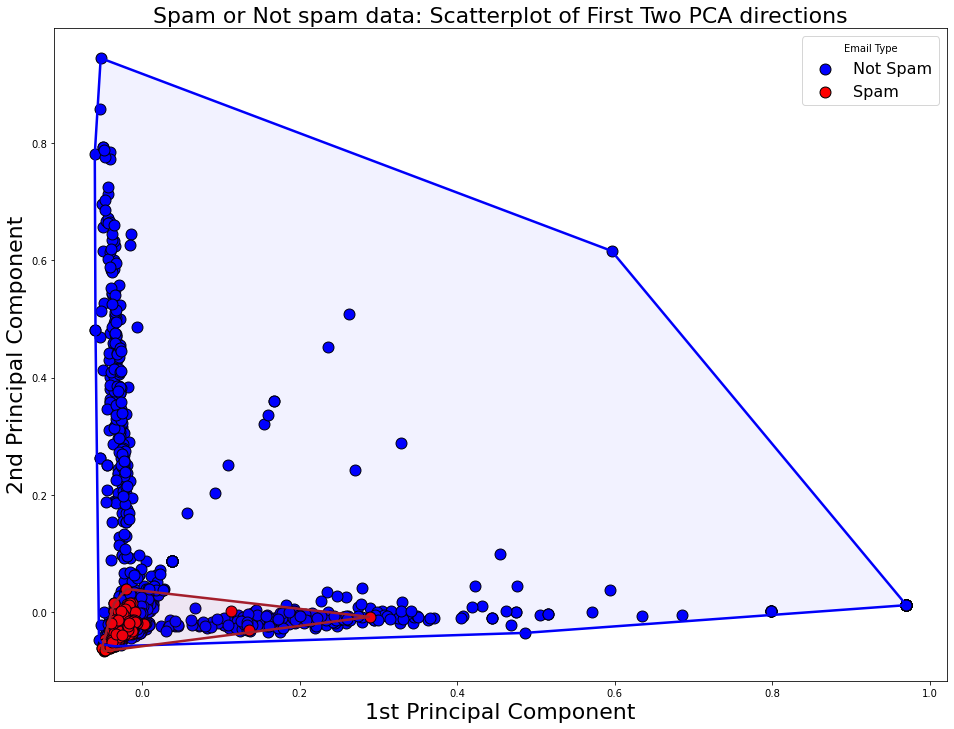

In [84]:
fig, ax = plt.subplots(1,1, figsize=(16,12))

# Plot
ax.scatter(data_pca.loc[rows_0.tolist(), 1], data_pca.loc[rows_0.tolist(), 2], c='blue', edgecolor='k', s=120, label='Not Spam')
ax.scatter(data_pca.loc[rows_1.tolist(), 1], data_pca.loc[rows_1.tolist(), 2], c='red', edgecolor='k', s=120, label='Spam')

# Encircle the boundaries
encircle(data_pca.loc[rows_0.tolist(), 1], data_pca.loc[rows_0.tolist(), 2], ec="blue", fc="none", linewidth=2.5)
encircle(data_pca.loc[rows_1.tolist(), 1], data_pca.loc[rows_1.tolist(), 2], ec="firebrick", fc="none", linewidth=2.5)

# Shading
encircle(data_pca.loc[rows_1.tolist(), 1], data_pca.loc[rows_1.tolist(), 2], ec="k", fc="firebrick", alpha=0.05)
encircle(data_pca.loc[rows_0.tolist(), 1], data_pca.loc[rows_0.tolist(), 2], ec="k", fc="blue", alpha=0.05)

# Labels
ax.set_title("Spam or Not spam data: Scatterplot of First Two PCA directions", fontsize=22)
ax.set_xlabel("1st Principal Component", fontsize=22)
ax.set_ylabel("2nd Principal Component", fontsize=22)
ax.legend(loc='best', title='Email Type', fontsize=16)
plt.show();

In [85]:
data_pca.shape

(5537, 2000)

In [86]:
df.v1.shape

(5537,)

In [88]:
# data_pca.drop(['target'],axis=1,inplace=True)

In [89]:
data_pca['target'] = pd.Series(list(df.v1), index=data_pca.index)

In [90]:
data_pca.target.unique()

array([0, 1], dtype=int64)

In [91]:
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,target
0,-0.015160,-0.016526,-0.022934,0.006600,-0.044812,0.045830,-0.067775,-0.034339,0.046155,-0.051658,...,-0.010048,-0.006328,0.003058,0.026653,0.001757,-0.011380,0.003504,0.008996,0.002239,0
1,0.253820,0.007666,0.009657,-0.031039,-0.006614,0.002131,-0.005156,-0.000302,-0.019117,0.015034,...,-0.000084,0.004513,0.002551,-0.004611,-0.003384,-0.004313,0.003640,0.001703,-0.004071,0
2,-0.028984,-0.026139,-0.037600,-0.081776,0.147207,-0.000039,0.035763,0.016736,0.069121,0.047166,...,-0.009079,-0.000234,0.010742,0.008674,0.000969,0.005094,-0.014328,0.007944,0.014656,1
3,-0.005267,-0.010489,-0.021250,0.001339,-0.020767,0.050402,-0.026358,-0.008281,0.010215,-0.003062,...,-0.001294,0.031976,-0.012356,-0.001741,-0.004382,0.008301,-0.024322,0.009963,0.006929,0
4,-0.025239,-0.012597,-0.024064,0.016303,-0.121255,0.022974,0.092952,-0.008906,0.033428,0.215001,...,0.001011,-0.000385,0.002214,-0.003032,0.000561,-0.002869,0.004877,0.003781,-0.001975,0


In [92]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
counter = Counter(data_pca.target)
print(counter)

Counter({0: 4791, 1: 746})


In [93]:
# oversample = SMOTE()
# X, y = oversample.fit_resample(data_pca.iloc[:, :-1], data_pca.target)
# # summarize the new class distribution
# counter = Counter(y)
# print(counter)

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_pca.iloc[:, :-1], data_pca.target, test_size=0.33, random_state=42)

In [95]:
ctrain = Counter(y_train)
print(ctrain)

Counter({0: 3213, 1: 496})


In [96]:
ctrain = Counter(y_test)
print(ctrain)

Counter({0: 1578, 1: 250})


In [97]:
X_train.shape

(3709, 2000)

In [98]:
over = SMOTE(sampling_strategy=0.6)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train, y_train = pipeline.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 3211, 1: 1927})


In [100]:
from sklearn.model_selection import ShuffleSplit
from sklearn import svm
clf = svm.SVC(kernel='poly', C=1).fit(X_train, y_train)

In [103]:
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X_train, y_train, cv=cv,scoring='roc_auc')


array([0.99872022, 0.99890235, 0.99720023, 0.99882868, 0.99748933])

In [104]:
predicted_categories = clf.predict(X_test)

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=predicted_categories))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1578
           1       1.00      0.61      0.76       250

    accuracy                           0.95      1828
   macro avg       0.97      0.80      0.86      1828
weighted avg       0.95      0.95      0.94      1828

